In [2]:
import wandb
import pandas as pd

api = wandb.Api()

# Your run path
entity = "jchud-stanford-university"
project = "KoyejoLab-SPA-scripts"
run_id = "8y9lyimx"

# Fetch the artifacts
math_artifact = api.artifact(f"{entity}/{project}/run-{run_id}-samplesmath-Vzcwpw:v0")
aime_artifact = api.artifact(f"{entity}/{project}/run-{run_id}-samplesaime-9kMLAg:v0")

# Download and convert to dataframes
math_table = math_artifact.get("samples/math")
aime_table = aime_artifact.get("samples/aime")

math_df = pd.DataFrame(data=math_table.data, columns=math_table.columns)
aime_df = pd.DataFrame(data=aime_table.data, columns=aime_table.columns)



wandb: Currently logged in as: jchud (jchud-stanford-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Downloading large artifact 'run-8y9lyimx-samplesmath-Vzcwpw:v0', 291.00MB. 1 files...
wandb:   1 of 1 files downloaded.  
Done. 00:00:00.4 (790.3MB/s)
wandb: Downloading large artifact 'run-8y9lyimx-samplesaime-9kMLAg:v0', 741.91MB. 1 files...
wandb:   1 of 1 files downloaded.  
Done. 00:00:00.2 (3156.5MB/s)


In [3]:
# Save to CSV
math_df.to_csv("math_results.csv", index=False)
aime_df.to_csv("aime_results.csv", index=False)

print(f"Math samples: {len(math_df)}")
print(f"AIME samples: {len(aime_df)}")


Math samples: 25600
AIME samples: 25600


In [4]:
print(aime_df.head(10))

  dataset  qid  sample_id                                           question  \
0    aime    0          0  If $a<b<c<d<e^{}_{}$ are consecutive positive ...   
1    aime    0          1  If $a<b<c<d<e^{}_{}$ are consecutive positive ...   
2    aime    0          2  If $a<b<c<d<e^{}_{}$ are consecutive positive ...   
3    aime    0          3  If $a<b<c<d<e^{}_{}$ are consecutive positive ...   
4    aime    0          4  If $a<b<c<d<e^{}_{}$ are consecutive positive ...   
5    aime    0          5  If $a<b<c<d<e^{}_{}$ are consecutive positive ...   
6    aime    0          6  If $a<b<c<d<e^{}_{}$ are consecutive positive ...   
7    aime    0          7  If $a<b<c<d<e^{}_{}$ are consecutive positive ...   
8    aime    0          8  If $a<b<c<d<e^{}_{}$ are consecutive positive ...   
9    aime    0          9  If $a<b<c<d<e^{}_{}$ are consecutive positive ...   

          gold         pred                                           response  
0  \boxed{675}  \boxed{675}  <think>\n

In [5]:
preds = aime_df["pred"]
counter = 0
for i in range(len(list(preds))):
    print(f"iteration {i}: {preds[i]}")
    # if pd.isna(preds.iloc[i]):
    #     counter += 1
    if preds.iloc[i] == "" or str(preds.iloc[i]).strip() == "":
        counter += 1
        print(f"iteration {i}: empty string")

iteration 0: \boxed{675}
iteration 1: \boxed{675}
iteration 2: \boxed{675}
iteration 3: \boxed{675}
iteration 4: \boxed{675}
iteration 5: \boxed{675}
iteration 6: \boxed{675}
iteration 7: \boxed{675}
iteration 8: \boxed{675}
iteration 9: \boxed{675}
iteration 10: \boxed{675}
iteration 11: \boxed{675}
iteration 12: \boxed{675}
iteration 13: \boxed{675}
iteration 14: \boxed{675}
iteration 15: \boxed{675}
iteration 16: \boxed{675}
iteration 17: \boxed{675}
iteration 18: \boxed{675}
iteration 19: \boxed{675}
iteration 20: \boxed{675}
iteration 21: \boxed{675}
iteration 22: \boxed{675}
iteration 23: \boxed{675}
iteration 24: \boxed{675}
iteration 25: \boxed{675}
iteration 26: \boxed{675}
iteration 27: \boxed{675}
iteration 28: \boxed{675}
iteration 29: \boxed{675}
iteration 30: \boxed{675}
iteration 31: \boxed{675}
iteration 32: \boxed{675}
iteration 33: \boxed{675}
iteration 34: \boxed{675}
iteration 35: \boxed{675}
iteration 36: \boxed{675}
iteration 37: \boxed{675}
iteration 38: \boxed{6

In [6]:
print(f"For the most recent run of AIME, we got {counter} incomplete answers out of {len(aime_df)}: {counter/len(aime_df)}")


For the most recent run of AIME, we got 719 incomplete answers out of 25600: 0.0280859375


We need to create a plot of majority accuracy vs. number of samples. 

DATASET: aime
Number of unique questions: 128
Samples per question: 200
n=  1: accuracy = 0.9009 ± 0.0180
n=  2: accuracy = 0.8964 ± 0.0176
n=  4: accuracy = 0.9169 ± 0.0129
n=  8: accuracy = 0.9247 ± 0.0103
n= 16: accuracy = 0.9271 ± 0.0086
n= 32: accuracy = 0.9290 ± 0.0083
n= 64: accuracy = 0.9292 ± 0.0073
n=128: accuracy = 0.9290 ± 0.0070
total is 128
n=200: accuracy = 0.9297 (exact)


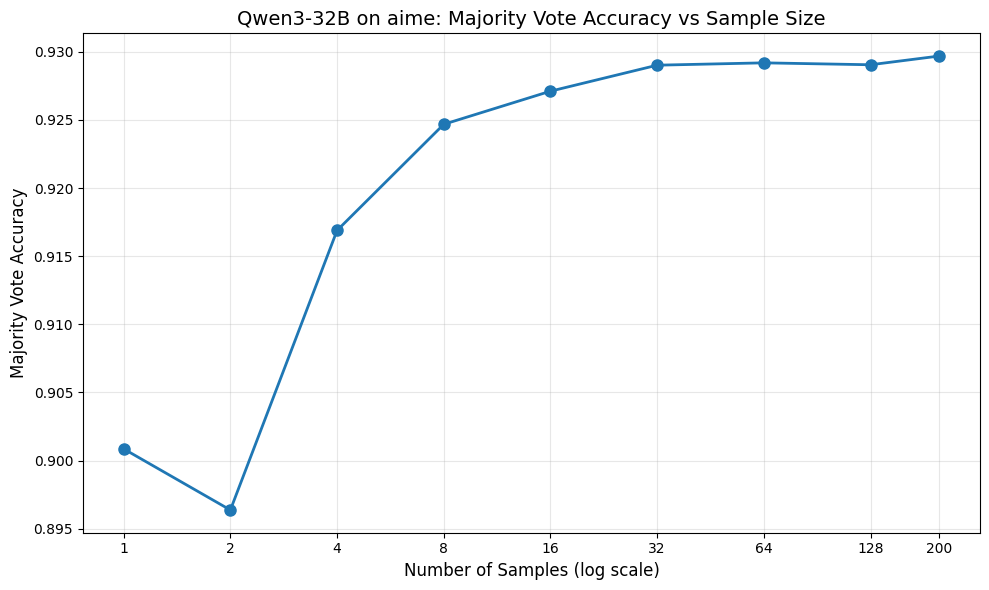

DATASET: math
Number of unique questions: 128
Samples per question: 200
n=  1: accuracy = 0.7411 ± 0.0088
n=  2: accuracy = 0.7413 ± 0.0093
n=  4: accuracy = 0.7403 ± 0.0055
n=  8: accuracy = 0.7403 ± 0.0036
n= 16: accuracy = 0.7407 ± 0.0031
n= 32: accuracy = 0.7413 ± 0.0025
n= 64: accuracy = 0.7419 ± 0.0015
n=128: accuracy = 0.7421 ± 0.0007
total is 128
n=200: accuracy = 0.7422 (exact)


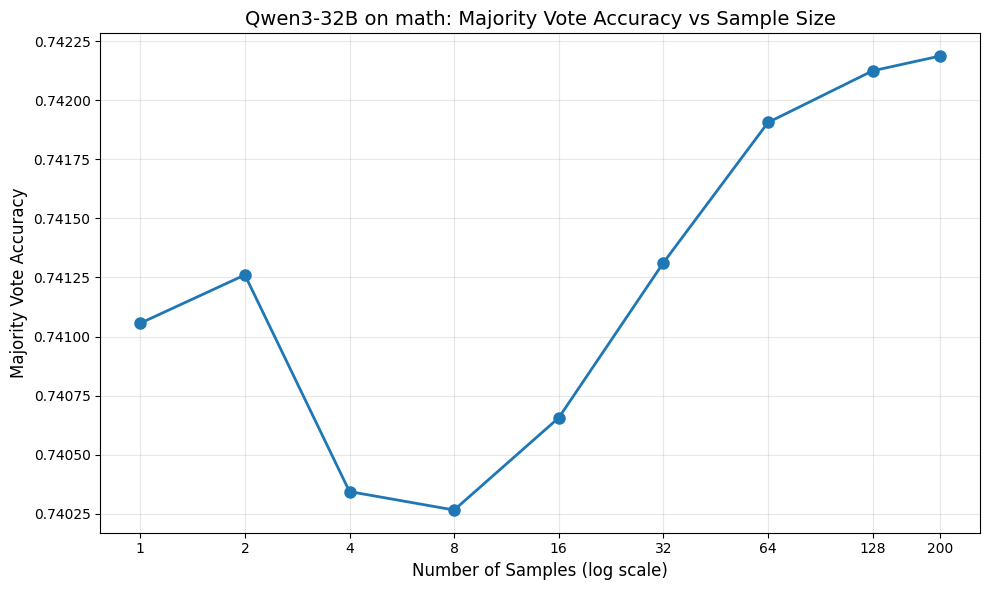

In [11]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


def get_majority_vote(predictions):
    """Get majority vote, ignoring empty/NaN predictions."""
    valid_preds = [p for p in predictions if pd.notna(p) and str(p).strip() != ""]
    if not valid_preds:
        return None
    counts = Counter(valid_preds)
    return counts.most_common(1)[0][0]

def get_true_majority_accuracy(df):
    """Compute actual majority vote accuracy using all samples per question."""
    correct = 0
    total = 0
    
    for qid, group in df.groupby("qid"):
        gold = group["gold"].iloc[0]
        preds = group["pred"].tolist()
        
        majority = get_majority_vote(preds)
        if majority is not None:
            correct += (majority == gold)
            total += 1
    print(f"total is {total}")
    return correct / total if total > 0 else 0


def bootstrap_majority_accuracy(df, n_samples, n_bootstrap=500):
    """
    For each question, bootstrap n_samples from available predictions,
    compute majority vote, check if correct. Repeat n_bootstrap times.
    """
    accuracies = []
    
    for _ in range(n_bootstrap):
        correct = 0
        total = 0
        
        for qid, group in df.groupby("qid"):
            gold = group["gold"].iloc[0]
            preds = group["pred"].tolist()
            
            # Bootstrap sample n predictions
            sampled_preds = np.random.choice(preds, size=min(n_samples, len(preds)), replace=True)
            
            majority = get_majority_vote(sampled_preds)
            if majority is not None:
                correct += (majority == gold)
                total += 1
        
        accuracies.append(correct / total if total > 0 else 0)
    
    return np.mean(accuracies), np.std(accuracies), np.percentile(accuracies, [5, 95])

def plot(dataset):
    sample_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 200]
    df: pd.DataFrame = pd.DataFrame()

    if dataset == "aime":
        df = aime_df
    if dataset == "math":
        df = math_df

    print(f"DATASET: {dataset}")
    print(f"Number of unique questions: {df['qid'].nunique()}")
    print(f"Samples per question: {len(df) // df['qid'].nunique()}")
    
    results = []
    for n in sample_sizes:
        if n == 200:
            # Exact computation for full sample size (no bootstrap)
            true_acc = get_true_majority_accuracy(df)
            results.append({
                "n_samples": n,
                "mean_accuracy": true_acc,
                "std": 0,
                "ci_low": true_acc,
                "ci_high": true_acc
            })
            print(f"n={n:3d}: accuracy = {true_acc:.4f} (exact)")
        else:
            # Bootstrap for smaller sample sizes
            mean_acc, std_acc, ci = bootstrap_majority_accuracy(df, n, n_bootstrap=500)
            results.append({
                "n_samples": n,
                "mean_accuracy": mean_acc,
                "std": std_acc,
                "ci_low": ci[0],
                "ci_high": ci[1]
            })
            print(f"n={n:3d}: accuracy = {mean_acc:.4f} ± {std_acc:.4f}")

    results_df = pd.DataFrame(results)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.errorbar(
        results_df["n_samples"], 
        results_df["mean_accuracy"], 
        # yerr=results_df["std"],
        marker='o', capsize=5, capthick=2, linewidth=2, markersize=8
    )
    plt.xscale("log", base=2)
    plt.xlabel("Number of Samples (log scale)", fontsize=12)
    plt.ylabel("Majority Vote Accuracy", fontsize=12)
    plt.title(f"Qwen3-32B on {dataset}: Majority Vote Accuracy vs Sample Size", fontsize=14)
    plt.xticks(sample_sizes, sample_sizes)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"majority_accuracy_{dataset}.png", dpi=150)
    plt.show()


if __name__ == "__main__":
    datasets = ["aime", "math"]
    for dataset in datasets: 
        plot(dataset)
        

